<a href="https://colab.research.google.com/github/Prasamsha0/Earthquake-Damage-prediction/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/ML"


ML1.ipynb  nepal-earthquake-severity-index-latest.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/nepal-earthquake-severity-index-latest.csv')
df.head()

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   P_CODE               3985 non-null   object 
 1   VDC_NAME             3985 non-null   object 
 2   DISTRICT             3985 non-null   object 
 3   REGION               3985 non-null   object 
 4   Hazard (Intensity)   3985 non-null   float64
 5   Exposure             3985 non-null   float64
 6   Housing              3985 non-null   float64
 7   Poverty              3985 non-null   float64
 8   Vulnerability        3985 non-null   float64
 9   Severity             3985 non-null   float64
 10  Severity Normalized  3985 non-null   float64
 11  Severity category    3985 non-null   object 
dtypes: float64(7), object(5)
memory usage: 373.8+ KB


In [ ]:
df.describe()


,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000
mean,0.320537,0.067493,5.706522,5.481854,5.594635,0.248720,0.510221
std,0.779937,0.187551,1.953037,2.270975,1.450817,0.298756,0.612652
min,0.000000,0.000000,1.170000,0.000000,1.620000,0.000000,0.000000
25%,0.000000,0.030000,4.640000,3.330000,4.590000,0.050000,0.094100
50%,0.010000,0.050000,5.610000,5.620000,5.550000,0.140000,0.286200
75%,0.130000,0.070000,6.850000,7.350000,6.660000,0.360000,0.744800
max,10.000000,10.000000,9.940000,10.000000,8.830000,4.880000,10.000000


In [ ]:
df.columns

Index(['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Hazard (Intensity)',
       'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity',
       'Severity Normalized', 'Severity category'],
      dtype='object')



*   List item machine cannnot work directly with categorical variables
*   List item converting theese into numbers using label encoding



In [ ]:
df['Severity category'].unique()

array(['Highest', 'High', 'Medium-High', 'Medium-Low', 'Low', 'Lowest',
       nan], dtype=object)

This line import label encoder from scikit learn which turns text labels into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

fit_transfrom looks for all the unique values and assigns the value to each
transform converts those value into numbers

In [ ]:
df['Severity_Encoded'] = le.fit_transform(df['Severity category'])


In [ ]:
print(le.classes_)


['High' 'Highest' 'Low' 'Lowest' 'Medium-High' 'Medium-Low' nan]


In [ ]:
df[['Severity category', 'Severity_Encoded']].drop_duplicates()


,Severity category,Severity_Encoded
0,Highest,1
19,High,0
187,Medium-High,4
620,Medium-Low,5
1292,Low,2
2092,Lowest,3
3985,NaN,6


Cleaning data

In [ ]:
df.isnull().sum()


,0
P_CODE,1
VDC_NAME,1
DISTRICT,1
REGION,1
Hazard (Intensity),1
Exposure,1
Housing,1
Poverty,1
Vulnerability,1
Severity,1


In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

,0
P_CODE,0
VDC_NAME,0
DISTRICT,0
REGION,0
Hazard (Intensity),0
Exposure,0
Housing,0
Poverty,0
Vulnerability,0
Severity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3985 entries, 0 to 3984
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   P_CODE               3985 non-null   object 
 1   VDC_NAME             3985 non-null   object 
 2   DISTRICT             3985 non-null   object 
 3   REGION               3985 non-null   object 
 4   Hazard (Intensity)   3985 non-null   float64
 5   Exposure             3985 non-null   float64
 6   Housing              3985 non-null   float64
 7   Poverty              3985 non-null   float64
 8   Vulnerability        3985 non-null   float64
 9   Severity             3985 non-null   float64
 10  Severity Normalized  3985 non-null   float64
 11  Severity category    3985 non-null   object 
 12  Severity_Encoded     3985 non-null   int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 435.9+ KB


In [ ]:
df.describe()


,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity_Encoded
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000
mean,0.320537,0.067493,5.706522,5.481854,5.594635,0.248720,0.510221,3.109159
std,0.779937,0.187551,1.953037,2.270975,1.450817,0.298756,0.612652,1.170838
min,0.000000,0.000000,1.170000,0.000000,1.620000,0.000000,0.000000,0.000000
25%,0.000000,0.030000,4.640000,3.330000,4.590000,0.050000,0.094100,3.000000
50%,0.010000,0.050000,5.610000,5.620000,5.550000,0.140000,0.286200,3.000000
75%,0.130000,0.070000,6.850000,7.350000,6.660000,0.360000,0.744800,4.000000
max,10.000000,10.000000,9.940000,10.000000,8.830000,4.880000,10.000000,5.000000


In [ ]:
featured = ['Hazard (Intensity)',	'Exposure',	'Housing',	'Poverty',	'Vulnerability']
X = df[featured]
y = df['Severity_Encoded']

In [ ]:
print("X:", X.shape)
print("y", y.shape)



X: (3985, 5)
y (3985,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.9422835633626098


Data Visualization

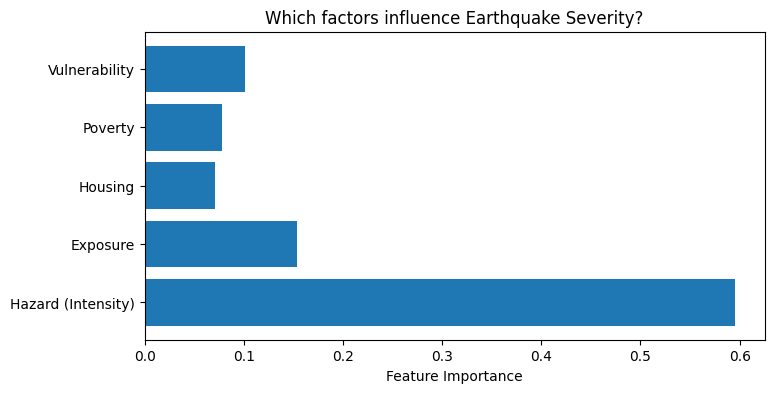

In [ ]:
import matplotlib.pyplot as plt
important_feature = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 4))
plt.barh(feature_names, important_feature)
plt.xlabel("Feature Importance")
plt.title("Which factors influence Earthquake Severity?")
plt.show()


In [ ]:
for i in range(len(feature_names)):
    print(feature_names[i], "=", round(important_feature[i], 3))


Hazard (Intensity) = 0.595
Exposure = 0.154
Housing = 0.071
Poverty = 0.078
Vulnerability = 0.101


In [ ]:
import joblib
# Save model to file
joblib.dump(model, 'earthquake_severity_model.joblib')


['earthquake_severity_model.joblib']

In [ ]:
from google.colab import files
files.download('earthquake_severity_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Go to your repo folder
%cd /content/Earthquake-Damage-prediction

# Pull latest updates from GitHub
!git pull origin main


[Errno 2] No such file or directory: '/content/Earthquake-Damage-prediction'
/content
fatal: not a git repository (or any of the parent directories): .git


In [34]:
!git clone https://github.com/Prasamsha0/Earthquake-Damage-prediction.git


Cloning into 'Earthquake-Damage-prediction'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 37 (delta 10), reused 21 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 944.96 KiB | 3.66 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [35]:
%cd Earthquake-Damage-prediction


/content/Earthquake-Damage-prediction


In [36]:
!git pull origin main

From https://github.com/Prasamsha0/Earthquake-Damage-prediction
 * branch            main       -> FETCH_HEAD
Already up to date.
